In [1]:
import pyarma as pa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib import cm

set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize = (7, 5))

In [2]:
val_10 = pa.mat()
val_10.load("val_10.bin")
val_10 = np.array(val_10).flatten()

vec_10 = pa.mat()
vec_10.load("vec_10.bin")
vec_10 = np.array(vec_10)
#add endpoints
vec_10 = np.concatenate((np.zeros((1, len(vec_10))).T, vec_10, np.zeros((1, len(vec_10))).T), axis = 1)

vec_ana_10 = pa.mat()
vec_ana_10.load("vec_ana_10.bin")
vec_ana_10 = np.array(vec_ana_10)
vec_ana_10 = np.concatenate((np.zeros((1, len(vec_ana_10))).T, vec_ana_10, np.zeros((1, len(vec_ana_10))).T), axis = 1)

In [3]:
val_100 = pa.mat()
val_100.load("val_100.bin")
val_100 = np.array(val_100).flatten()

vec_100 = pa.mat()
vec_100.load("vec_100.bin")
vec_100 = np.array(vec_100)
vec_100 = np.concatenate((np.zeros((1, len(vec_100))).T, vec_100, np.zeros((1, len(vec_100))).T), axis = 1)

vec_ana_100 = pa.mat()
vec_ana_100.load("vec_ana_100.bin")
vec_ana_100 = np.array(vec_ana_100)
vec_ana_100 = np.concatenate((np.zeros((1, len(vec_ana_100))).T, vec_ana_100, np.zeros((1, len(vec_ana_100))).T), axis = 1)

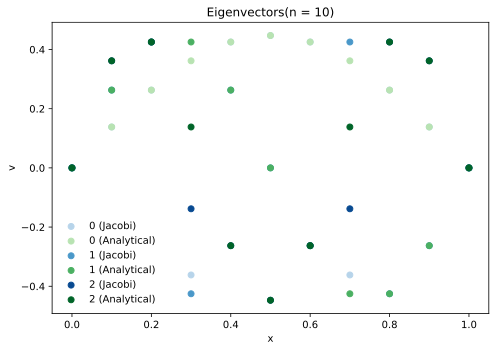

In [10]:
x_10 = np.linspace(0, 1, 11)

#plot the 3 eigenvectors corresponding to the 3 lowest eigenvalues
fig, ax = plt.subplots()
jacobi_colors = cm.Blues(np.linspace(0.3, 0.9, 3))
analytical_colors = cm.Greens(np.linspace(0.3, 0.9, 3))
for i in range(3):
    ax.scatter(x_10, vec_10[i], label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    ax.scatter(x_10, vec_ana_10[i], label = "%s (Analytical)"%i, color = analytical_colors[i])
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title("Eigenvectors(n = 10)")
#plt.savefig("eigenvectors10.pdf")
plt.tight_layout()

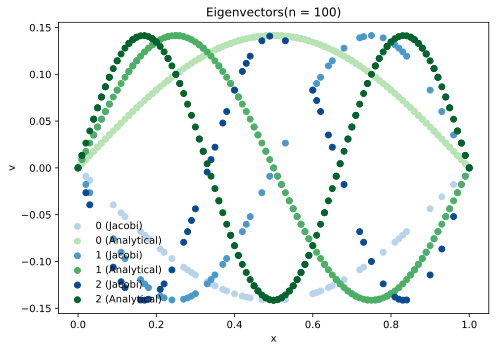

In [9]:
x_100 = np.linspace(0, 1, 101)

fig, ax = plt.subplots()
for i in range(3):
    ax.scatter(x_100, vec_100[i], label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    ax.scatter(x_100, vec_ana_100[i], label = "%s (Analytical)"%i, color = analytical_colors[i])
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title("Eigenvectors(n = 100)")
#plt.savefig("eigenvectors100.pdf")
plt.tight_layout()